con el objetivo de identificar el estres en la voz,se toman como ejemplo datos de audio de la base [RAVDESS](https://zenodo.org/record/1188976#.XsyEAmhKhPY). La cual tiene dos tipos de archivos:

Audio: Habla y canto 

Video: Habla y canto Cada uno de estos tiene varios identificadores, los cuales son los siguientes:

* Modalidad (01 = full-AV, 02 = video-only, 03 = audio-only).

* Canal de audio (01 = speech, 02 = song).

* Emoción (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

* Intensidad Emocional (01 = normal, 02 = strong).

* Declaración (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

* Repetición (01 = 1st repetition, 02 = 2nd repetition).

* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Se extraerán solo los archivos de audio, es decir "*.wav", de estos solo tomaremos los datos de tipo "habla" y para simular el estres de voz tomaremos como ejemplo las emociones "Calmado" que representará una voz no estresada y la emoción "asustado" que representará la voz estresada.

**Modalidad**:
* 03= Audio

**Canal**
* 01= Habla

**Emoción**:

*  02=Calmado (Tomará el valor 0: no estres en la voz)
*  06=Asustado (Tomará el valor 1: estres en la voz)


Con esto se obtiene un total de 384 audios donde 192 pertenecen a la categoria de voz no estresada y 192 a la categoria de voz estresada:

In [1]:
import librosa
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import os #para interactuar con las carpetas y archivos
import pandas as pd
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD
from scipy.stats import zscore

In [2]:
# Establecer conecxión con drive para extraer los datos
from google.colab import drive #Conexión con Drive
drive.mount('/content/drive')
#Ubicación de los datos 
PATH = '/content/drive/MyDrive/Hackaton zinobe/Dataset/Audio Img'

# lista de archivos de video
dir_list = os.listdir(PATH)

Mounted at /content/drive


In [6]:
dir_list[0]

'03-02-01-01-01-01-13.jpg'

In [8]:
emotion = []
path = []

for f in dir_list:
  part1 = f.split('.')[0].split('-')[2]
  part2 = f.split('.')[0].split('-')[1]
  if (part1=='02' or part1=='06')and (part2=='01'):
    path.append(PATH +'/' + f)
    emotion.append(part1)

In [13]:
#cambiamos el nombre de las emociones a valores 1 y 0 donde 
dic  =  {'02': 0 , '06':1}
dic_actual= {0:'Voz calmada',1:'Voz estresada'}
emotion=[dic[i] for i in emotion]

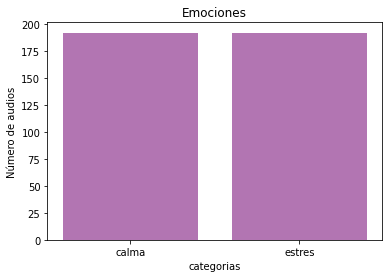

In [15]:

# Make a fake dataset:
height = pd.DataFrame(emotion).groupby(emotion).size()
bars = ('calma','estres')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Emociones')
plt.xlabel('categorias')
plt.ylabel('Número de audios')

# Create names on the x-axis
plt.xticks(y_pos, bars)


# Show graphic
plt.show()

# Lectura de los espectogramas

In [16]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims
from tensorflow.keras.applications.vgg16 import preprocess_input

In [22]:
len(emotion)

384

In [18]:
img=[]
for file in path:
    img1 = load_img(file, target_size=(223, 217))
    img1 = img_to_array(img1)
    img1 = preprocess_input(img1)
    img.append(img1)
n=np.array(img)

In [21]:
n.shape

(384, 223, 217, 3)

In [23]:
# Saving joblib files to not load them again with the loop above
X_name = 'X1.joblib'
y_name = 'Y1.joblib'
mod_name = 'mod.joblib'

save_dir = '/content/drive/MyDrive/Hackaton zinobe/Dataset/DATOS_PREPROCESADOS_AUDIO/Model_audio_img1'

savedX = joblib.dump(n, os.path.join(save_dir, X_name))
savedy = joblib.dump(emotion, os.path.join(save_dir, y_name))

In [24]:
# Loading saved models
import joblib

X = joblib.load('/content/drive/MyDrive/Hackaton zinobe/Dataset/DATOS_PREPROCESADOS_AUDIO/Model_audio_img1/X1.joblib')
y = joblib.load('/content/drive/MyDrive/Hackaton zinobe/Dataset/DATOS_PREPROCESADOS_AUDIO/Model_audio_img1/Y1.joblib')

# Ejemplo de un espectograma leido del conjunto de datos

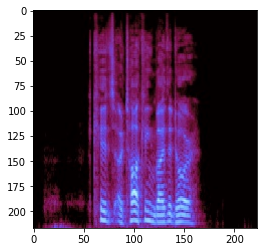

In [31]:
# Imagen de espectograma original
import cv2 as cv
from matplotlib import pyplot as plt
image1 = cv.imread(path[0])
plt.imshow(image1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


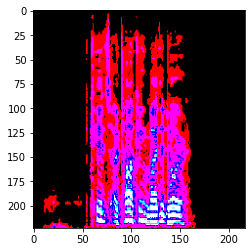

In [26]:
#Imagen de espectograma preprocesado visto como datos de tensor
plt.figure()
plt.imshow(X[0])
plt.grid(False)
plt.show()

In [ ]:
X[0]